In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import gspread
from oauth2client.service_account import ServiceAccountCredentials

## **Load Data**

In [30]:
# Set up Google Sheets API credentials
key = '/Users/derekwu/Desktop/Data/Code/google_api_cred_key.json'
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(key, scope)
client = gspread.authorize(creds)

# Open the Google Sheet (use the name or URL of your sheet)
spreadsheet = client.open('wic_wait_times').sheet1

In [79]:
data = spreadsheet.get_all_values()

# Optionally convert the data into a pandas DataFrame for analysis
df = pd.DataFrame(data[1:], columns=data[0])

## **Clean Data**

In [80]:
df['lastUpdated'] = pd.to_datetime(df['lastUpdated'].str[:-6])
df['queue'] = pd.to_numeric(df['queue'], errors='coerce')
df['wait_time'] = pd.to_timedelta(df['wait_time'] + ':00')
df['treat_time'] = pd.to_timedelta(df['treat_time'] + ':00')
df['total_time'] = pd.to_timedelta(df['total_time'] + ':00')

df['wait_time'] = df['wait_time'].dt.total_seconds() / 3600
df['treat_time'] = df['treat_time'].dt.total_seconds() / 3600
df['total_time'] = df['total_time'].dt.total_seconds() / 3600

## **Exploratory Data Analysis**

In [85]:
# Generating summary statistics for the queue, wait_time, treat_time, and total_time columns
summary_stats_corrected = df[['queue', 'wait_time', 'treat_time', 'total_time']].describe()
summary_stats_corrected.round(2)

,queue,wait_time,treat_time,total_time
count,8883.00,8883.00,8883.00,8883.00
mean,4.61,1.03,1.21,2.23
std,5.66,1.01,1.57,2.37
min,0.00,0.00,0.00,0.00
25%,0.00,0.05,0.00,0.05
50%,3.00,0.87,0.50,1.33
75%,6.00,1.40,2.47,4.77
max,33.00,4.43,8.72,10.12


In [83]:
# Grouping by 'id' and running summary statistics
queue = df[['id', 'queue']].groupby('id').describe().round(2)
wait_time = df[['id', 'wait_time']].groupby('id').describe().round(2)
treat_time = df[['id', 'treat_time']].groupby('id').describe().round(2)
total_time = df[['id', 'total_time']].groupby('id').describe().round(2)

In [86]:
wait_time

wait_time                                          
             count  mean   std   min   25%   50%   75%   max
id                                                          
BELWIC      1269.0  0.60  0.53  0.00  0.00  0.62  1.05  1.72
CBRHOSED    1269.0  2.57  1.02  1.07  1.60  2.35  3.73  4.43
DICWIC      1269.0  0.51  0.43  0.00  0.00  0.55  0.83  1.25
GUNWIC      1269.0  0.48  0.41  0.00  0.00  0.52  0.90  1.17
NORHOSED    1269.0  1.99  0.62  0.90  1.33  2.12  2.47  3.70
TUGWIC      1269.0  0.38  0.36  0.00  0.00  0.28  0.67  1.18
WECWIC      1269.0  0.66  0.58  0.00  0.00  0.75  1.15  1.92

### **Time Series**

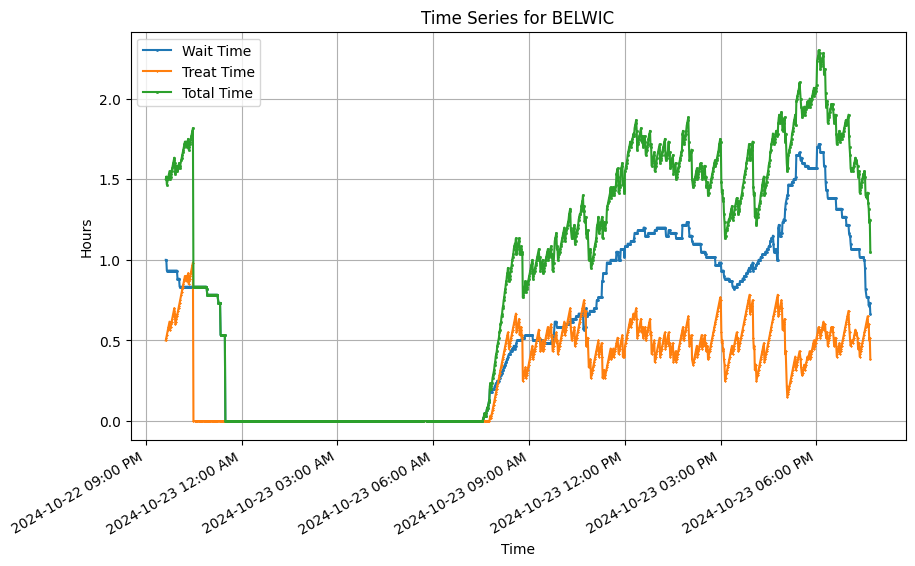

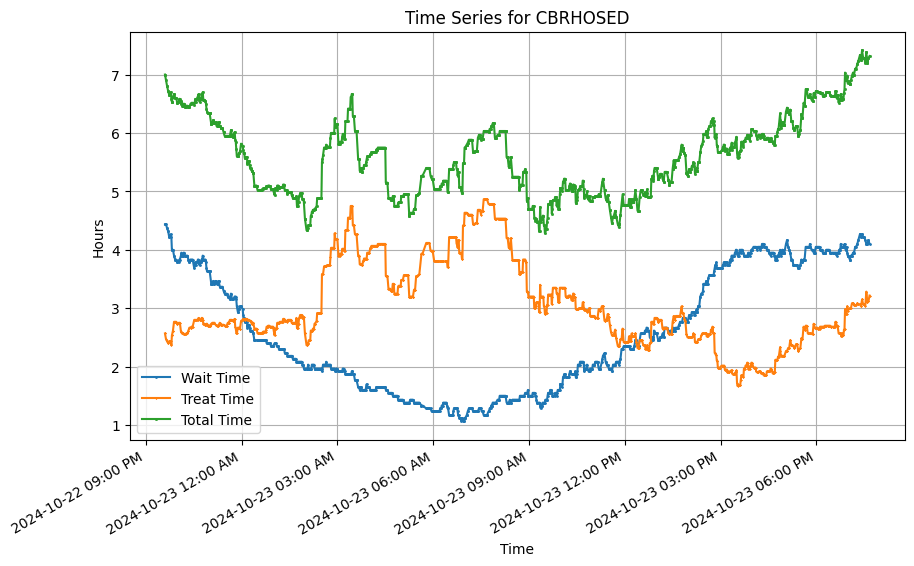

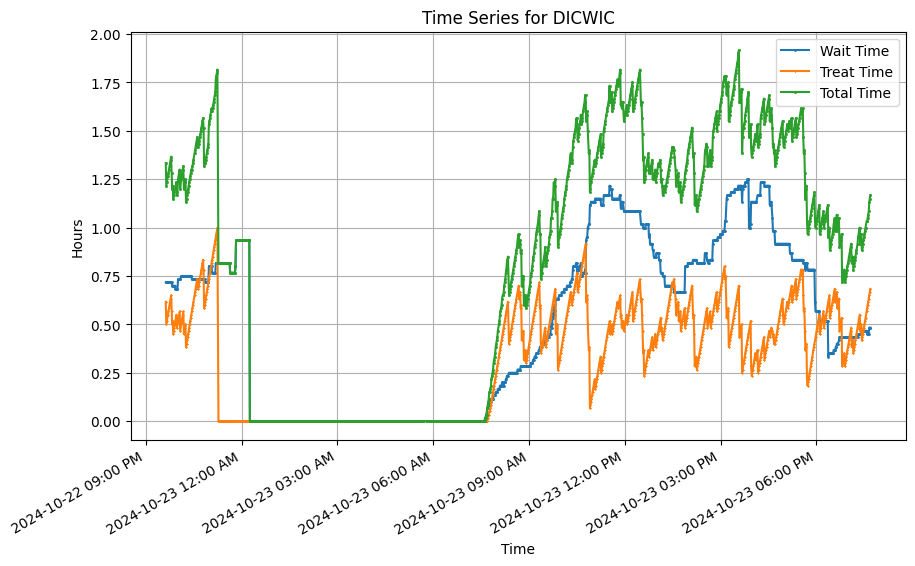

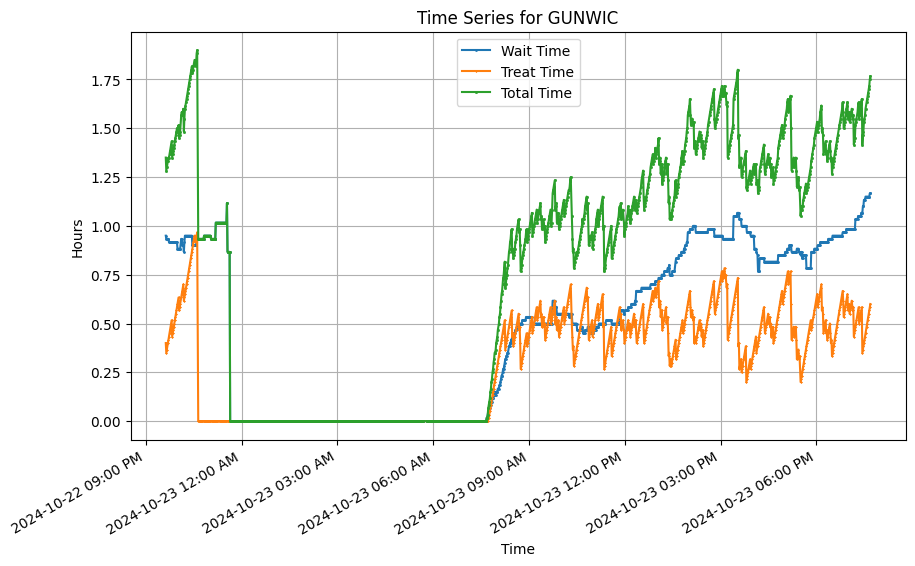

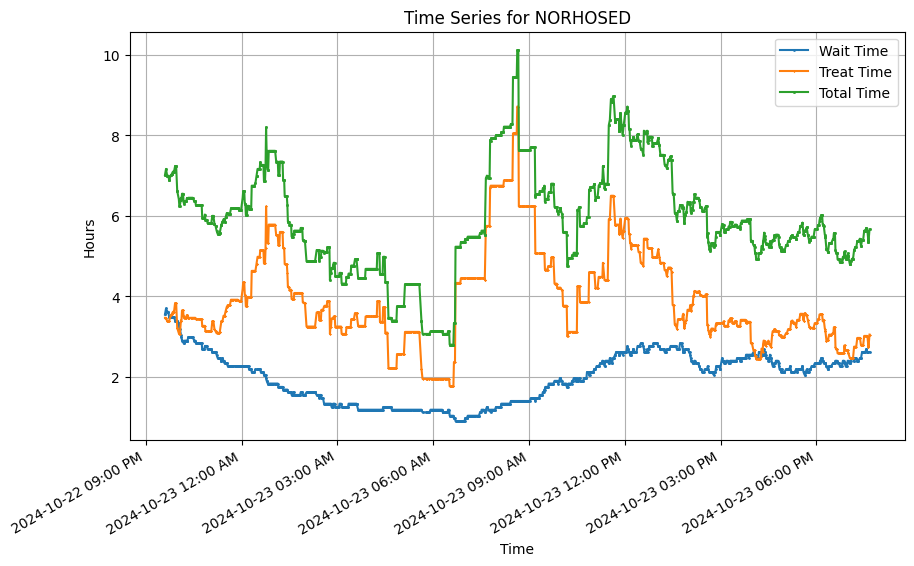

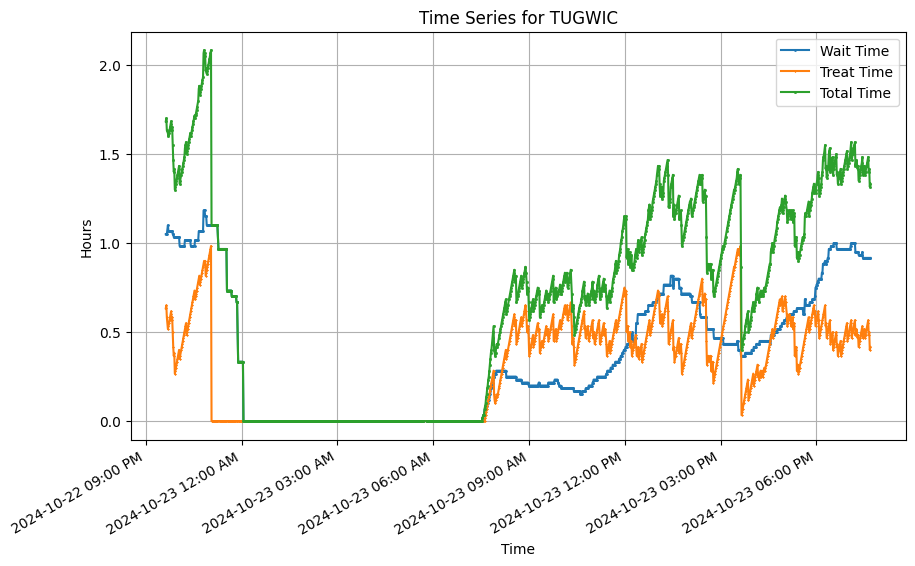

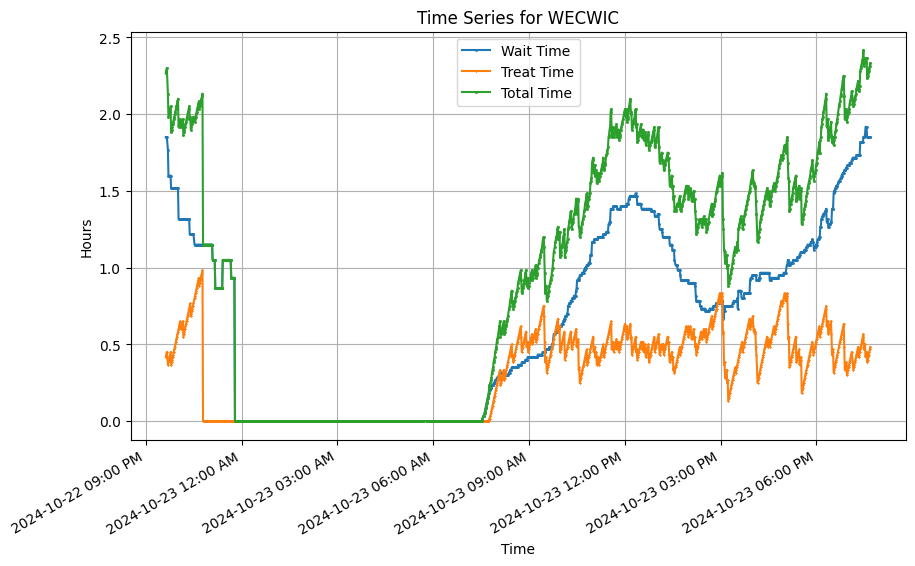

In [68]:
# Grouping by 'id'
grouped = df.groupby('id')

# Plotting time series for each unique 'id'
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    plt.plot(group['lastUpdated'], group['wait_time'], label='Wait Time', marker='o', markersize = 1)
    plt.plot(group['lastUpdated'], group['treat_time'], label='Treat Time', marker='x', markersize = 1)
    plt.plot(group['lastUpdated'], group['total_time'], label='Total Time', marker='s', markersize = 1)

    # Formatting the x-axis to show date and time in AM/PM format
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %I:%M %p' ))
    
    # Rotating the x-axis labels for better readability
    plt.gcf().autofmt_xdate()

    # Adding labels and title
    plt.xlabel('Time')
    plt.ylabel('Hours')
    plt.title(f'Time Series for {name}')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

## **Scatter plots**

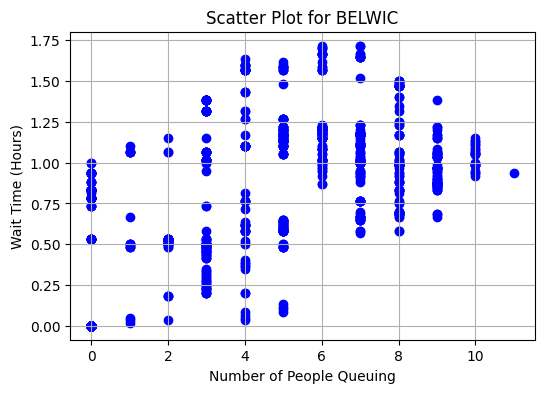

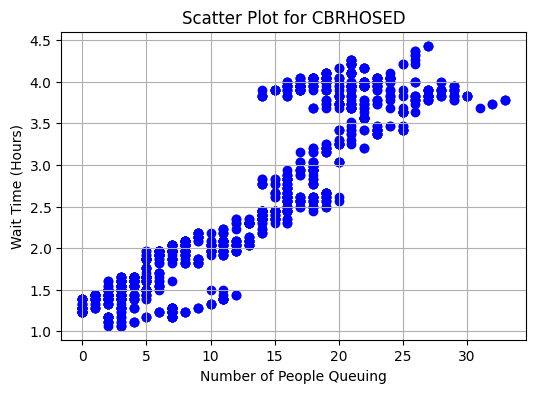

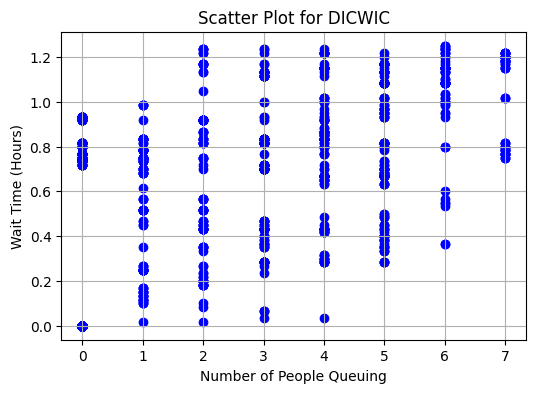

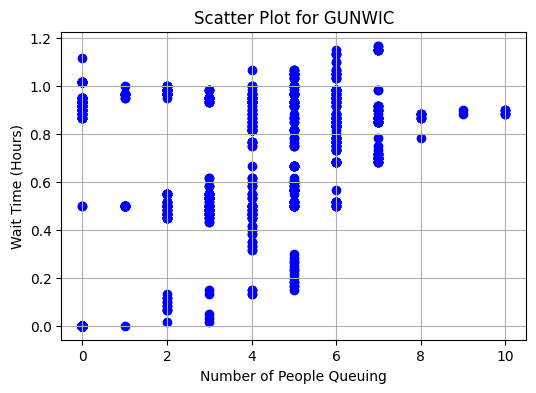

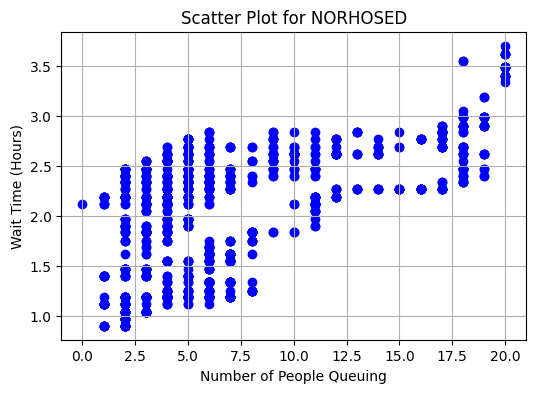

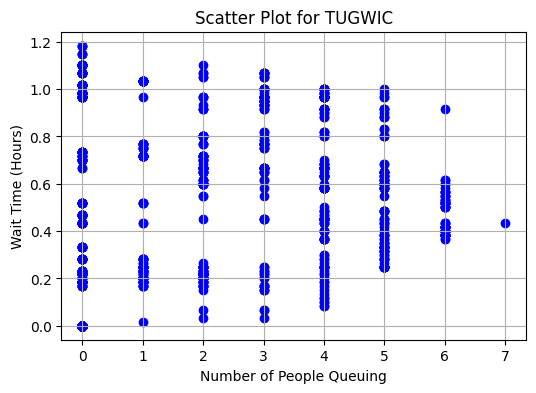

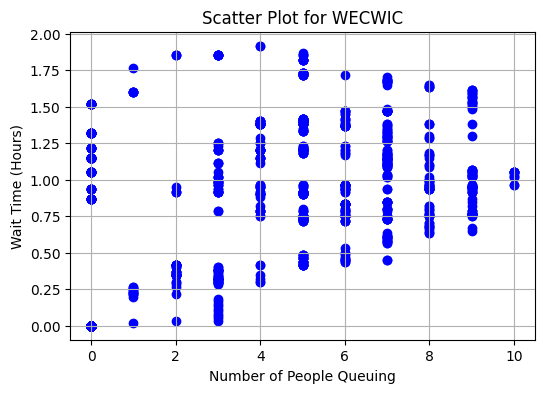

In [91]:
# Grouping by 'id'
grouped = df.groupby('id')

# Plotting scatter plots for each unique 'id'
for name, group in grouped:
    plt.figure(figsize=(6, 4))
    plt.scatter(group['queue'], group['wait_time'], c='blue', marker='o')

    # Adding labels and title
    plt.xlabel('Number of People Queuing')
    plt.ylabel('Wait Time (Hours)')
    plt.title(f'Scatter Plot for {name}')

    # Display the plot
    plt.grid(True)
    plt.show()